!python3 -m pip install update pip
!python3 -m pin install --upgrade pip

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import math
pi = math.pi
pi

3.141592653589793

In [4]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [5]:
def rot_t(theta):
    rad = math.pi * theta / 180.0
    c,s = math.cos(rad),math.sin(rad)
    return np.array([[c,-s],[s,c]])

rot_t(90)

array([[ 6.123234e-17, -1.000000e+00],
       [ 1.000000e+00,  6.123234e-17]])

In [6]:
rot_t(45)

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [28]:
def data_rot(ps,theta):
    return [ p*rot_t(theta) for p in ps ]

In [29]:
def it2():  # impossible triangle
    S = 2.0
    k = math.sqrt(3)/2
    x0 = S/2
    y0 = k*x0
    L = S/8
    H = L * k
    def p(x,y):
        return list([L*x-x0,H*y-y0])
    p1 = p(1.0,0.0)
    p2 = p(7.0,0.0)
    p3 = p(7.5,1.0)
    p4 = p(4.5,7.0)
    p5 = p(3.5,7.0)
    p6 = p(0.5,1.0)
    p7 = p(4.5,5.0)
    p8 = p(3.0,2.0)
    p9 = p(2.0,2.0)
    p10 = p(5.0,2.0)
    p11 = p(5.5,1.0)
    p12 = p(4.0,4.0)
    plist =  [p1,p2,p3,p4,p5,p6,p1,p2,p7,p8,p9,p4,p9,p10,p12,p11,p6] 
    # plist = data_rot(plist,45)
    return [ p[0] for p in plist ],[ p[1] for p in plist ]
    

In [46]:
import math

def rotate_th_degrees(th,coords):
    xs,ys,N = 0,0,len(coords)
    for coord in coords:
        xs += coord[0]
        ys += coord[1]
    gx,gy = xs/N, ys/N
    G = (gx,gy)

    rth = math.radians(th)
    rxy = []
    for coord in coords:
        x = coord[0] - G[0]
        y = coord[1] - G[1]
        xt = x * math.cos(rth) - y * math.sin(rth)
        yt = x * math.sin(rth) + y * math.cos(rth)
        xt += G[0]
        yt += G[1]
        rxy += [(xt,yt)]
        
    return rxy


In [47]:
x,y = it2()
z = [[x[i],y[i]] for i in range(len(x))]

rz = rotate_th_degrees(180,z)
# print(f'{rz}')
px,py = [r[0] for r in rz],[r[1] for r in rz]
# print(f'{px}, {py}')

[(0.6029411764705884, 0.20377068324339714), (-0.8970588235294116, 0.20377068324339737), (-1.0220588235294117, -0.012735667702712172), (-0.2720588235294119, -1.3117737733793704), (-0.022058823529411888, -1.3117737733793704), (0.7279411764705883, -0.012735667702712394), (0.6029411764705884, 0.20377068324339714), (-0.8970588235294116, 0.20377068324339737), (-0.27205882352941185, -0.878761071487151), (0.10294117647058822, -0.22924201864882202), (0.3529411764705882, -0.22924201864882204), (-0.2720588235294119, -1.3117737733793704), (0.3529411764705882, -0.22924201864882204), (-0.3970588235294118, -0.22924201864882193), (-0.1470588235294118, -0.6622547205410413), (-0.5220588235294117, -0.012735667702712228), (0.7279411764705883, -0.012735667702712394)]
[0.6029411764705884, -0.8970588235294116, -1.0220588235294117, -0.2720588235294119, -0.022058823529411888, 0.7279411764705883, 0.6029411764705884, -0.8970588235294116, -0.27205882352941185, 0.10294117647058822, 0.3529411764705882, -0.272058823

<Figure size 640x480 with 0 Axes>

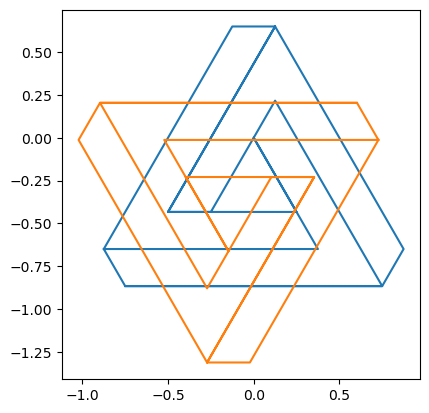

In [48]:
fig = plt.figure()

fig, ax = plt.subplots()
ax.plot(it2()[0],it2()[1])
ax.plot(px,py)
ax.set_aspect('equal')

plt.show()

<Figure size 640x480 with 0 Axes>

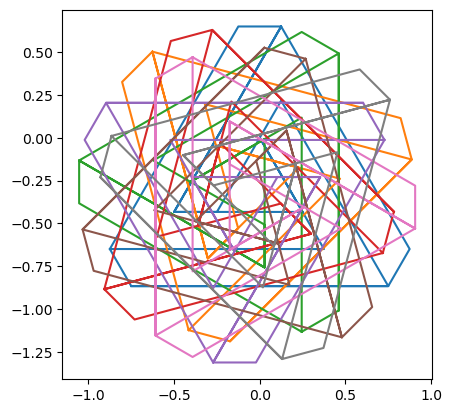

In [50]:
x,y = it2()
z = [[x[i],y[i]] for i in range(len(x))]
fig = plt.figure()
fig, ax = plt.subplots()

ax.plot(x,y)

for th in [45,90,135,180,225,270,315]:
    rz = rotate_th_degrees(th,z)
    px,py = [r[0] for r in rz],[r[1] for r in rz]
    ax.plot(px,py)
    ax.set_aspect('equal')
    
plt.show()
    